<a href="https://colab.research.google.com/github/PavelStelmakhV/hw310-keras-fasion-mnist/blob/main/keras_fasion_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras import regularizers
from keras import callbacks
from keras import initializers

In [86]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [87]:
# x_train = x_train.reshape(60000, 784).astype('float32') / 255
# x_test = x_test.reshape(10000, 784).astype('float32') / 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Перемешаем тренировочные данные
# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [88]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [89]:
w_init = initializers.glorot_normal()
b_init = initializers.Zeros()

# model = Sequential()
# model.add(Dense(n_dense,
#                 input_dim=n_input,
#                 kernel_initializer=w_init,
#                 bias_initializer=b_init))
# model.add(Activation('sigmoid'))

In [90]:
model = tf.keras.Sequential()

drop_out = 0.2
lern_rat = 0.00001
neurons = 128

model.add(layers.Flatten(input_shape=(28, 28)))
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(neurons * 1, activation='relu', kernel_initializer=w_init, bias_initializer=b_init)) #, kernel_regularizer=regularizers.l2(lern_rat)
# model.add(layers.Dropout(drop_out))
model.add(layers.Dense(neurons * 2, activation='relu'))
# model.add(layers.Dropout(drop_out))

model.add(layers.Dense(neurons * 2, activation='tanh'))
model.add(layers.Dropout(drop_out))
model.add(layers.Dense(neurons * 4, activation='relu'))
model.add(layers.Dropout(drop_out))
# model.add(layers.Dense(neurons, activation='tanh', kernel_regularizer=regularizers.l2(lern_rat)))
# model.add(layers.Dropout(drop_out))

model.add(layers.Dense(10, activation='softmax'))
# model.add(layers.Softmax())

In [91]:
model.compile(#optimizer='adam',
              optimizer='adamax',
              # optimizer='nadam',
              # optimizer='rmsprop',
              # optimizer='sgd',
              # optimizer='adadelta',
              # loss='binary_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])

1/1 [==============================] - 0s 69ms/step


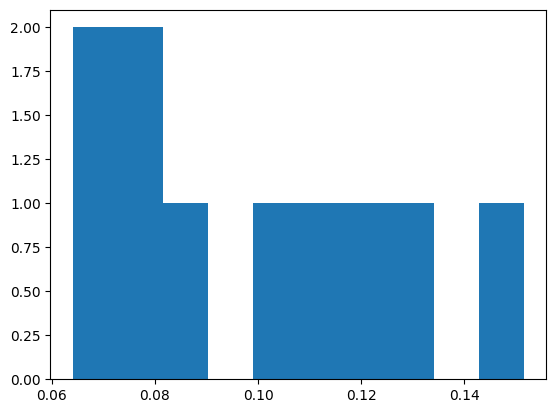

In [92]:
x = np.random.random((1, 28, 28))
a = model.predict(x)
_ = plt.hist(np.transpose(a))

In [93]:
callback = callbacks.EarlyStopping(monitor='val_loss', patience=12)

In [94]:
# model.fit(train_images, train_labels, epochs=20)
history = model.fit(x_train, y_train,
                    epochs=120,
                    batch_size=32,
                    callbacks=[callback],
                    verbose=1, #многословие
                    validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/120
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5242 - sparse_categorical_accuracy: 0.8093 - val_loss: 0.4417 - val_sparse_categorical_accuracy: 0.8418
Epoch 2/120
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3876 - sparse_categorical_accuracy: 0.8596 - val_loss: 0.3730 - val_sparse_categorical_accuracy: 0.8706
Epoch 3/120
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3456 - sparse_categorical_accuracy: 0.8735 - val_loss: 0.3757 - val_sparse_categorical_accuracy: 0.8625
Epoch 4/120
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3198 - sparse_categorical_accuracy: 0.8815 - val_loss: 0.3286 - val_sparse_categorical_accuracy: 0.8788
Epoch 5/120
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2997 - sparse_categorical_accuracy: 0.8897 - val_loss: 0.3146 - val_sparse_categorical_accuracy: 0.8842
Epoch 6/120
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2835 -

In [95]:
print('\nhistory dict:', list(history.history.keys()))


history dict: ['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy']


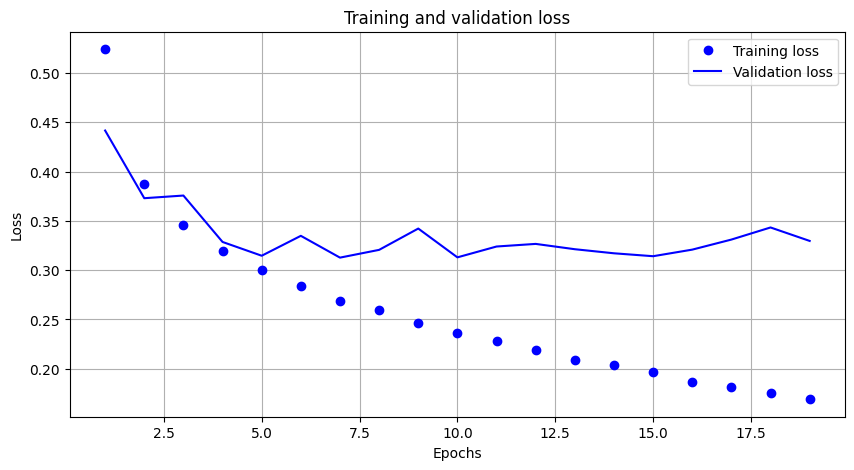

<Figure size 640x480 with 0 Axes>

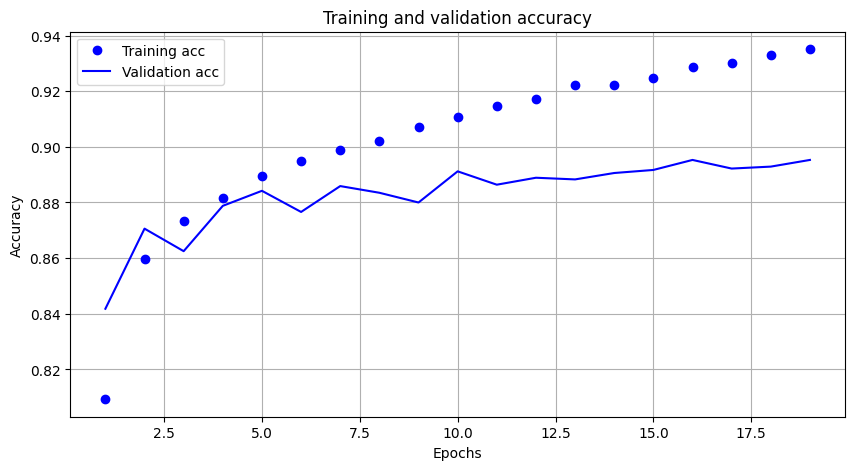

In [96]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.clf()
plt.figure(figsize=(10, 5))
val_acc_values = history_dict['sparse_categorical_accuracy']
plt.plot(epochs, history_dict['sparse_categorical_accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_sparse_categorical_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [97]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [98]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [99]:
predictions[0]

array([0.08534197, 0.08534134, 0.08534257, 0.08534148, 0.0853415 ,
       0.0853492 , 0.08534792, 0.08535556, 0.08534136, 0.23189712],
      dtype=float32)

In [100]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               100480    
                                                                 
 dense_26 (Dense)            (None, 256)               33024     
                                                                 
 dense_27 (Dense)            (None, 256)               65792     
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 512)               131584    
                                                                 
 dropout_13 (Dropout)        (None, 512)             